In [1]:
import numpy as np
import simple_model_ode as sm

In [5]:
LDM = sm.SimplifiedModel(data_analysis=False)
state = [np.deg2rad(17), 0, 0,  0 , 0, 0]
LDM.inverseLinkLegODE(state)

array([-6.41574,  0.     ])

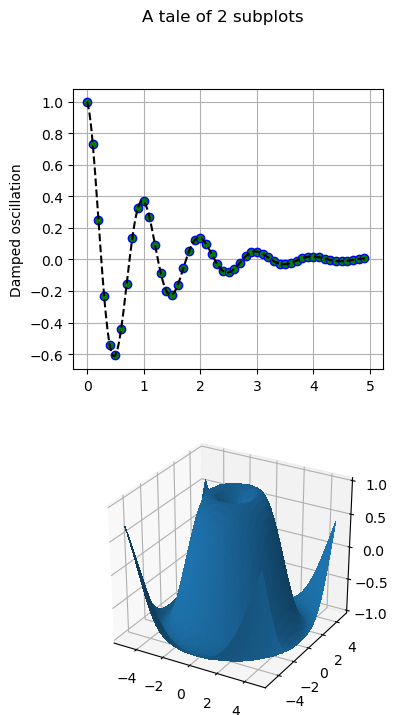

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


def f(t):
    return np.cos(2*np.pi*t) * np.exp(-t)


# Set up a figure twice as tall as it is wide
fig = plt.figure(figsize=plt.figaspect(2.))
fig.suptitle('A tale of 2 subplots')

# First subplot
ax = fig.add_subplot(2, 1, 1)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
t3 = np.arange(0.0, 2.0, 0.01)

ax.plot(t1, f(t1), 'bo',
        t2, f(t2), 'k--', markerfacecolor='green')
ax.grid(True)
ax.set_ylabel('Damped oscillation')

# Second subplot
ax = fig.add_subplot(2, 1, 2, projection='3d')

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1, 1)

plt.show()

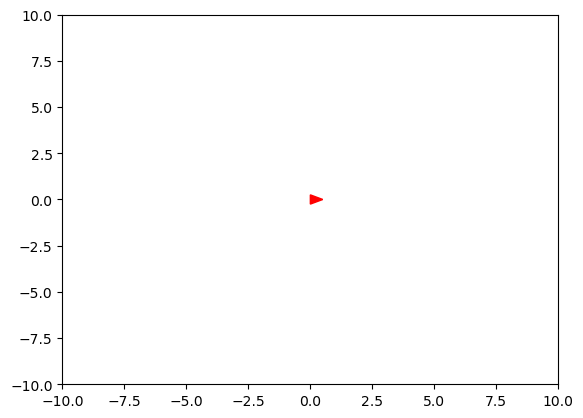

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import matplotlib.patches as patches

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)

v= np.array([
    [0., -0.25],  
    [0.5, 0.],  
    [0., 0.25]
    ])

patch = patches.Polygon(v,closed=True, fc='r', ec='r')
ax.add_patch(patch)

def init():
    return patch,

def animate(i):
    v[:,0]+=i
    patch.set_xy(v)
    return patch,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 5), init_func=init,
                              interval=1000, blit=True)
plt.show()

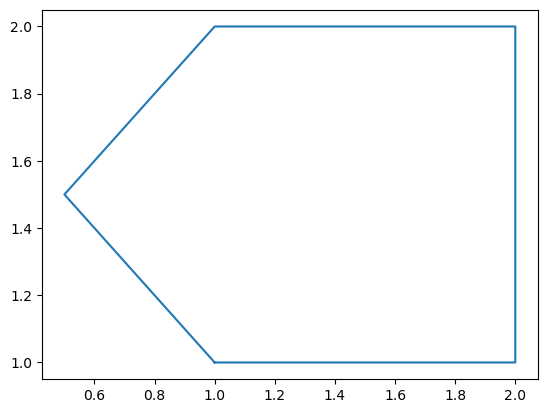

In [12]:
import matplotlib.pyplot as plt

coord = [[1,1], [2,1], [2,2], [1,2], [0.5,1.5]]
coord.append(coord[0]) #repeat the first point to create a 'closed loop'

xs, ys = zip(*coord) #create lists of x and y values

plt.figure()
plt.plot(xs,ys) 
plt.show()
